In [6]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat # Library to get mat files from SVHN Dataset
import matplotlib.image as img # Get images and make them matrices from Celeb A
from os import listdir # Get jpg images from Celeb A
from os.path import isfile, join # Just to get structure of files
from tempfile import TemporaryFile # To save matrix of images
import matplotlib.pyplot as plt

import logging
import os
import cloudstorage as gcs
from google.cloud import storage
# import webapp2
# from google.appengine.api import app_identity
# from google.appengine.api import images
import io
from PIL import Image

In [7]:
from image_gen import ImageCollector
import imageio

In [8]:
client = storage.Client()
# https://console.cloud.google.com/storage/browser/[bucket-id]/
bucket = client.get_bucket('inpainting-final-project')

In [9]:
bucket

<Bucket: inpainting-final-project>

In [10]:
import cv2

In [6]:
# blobs = bucket.list_blobs()

blobs = bucket.list_blobs(prefix='images/Cars/cars_train/')
images = [] 
for blob in blobs:
    blob = bucket.get_blob(blob.name)
    s = blob.download_as_string()
    img = Image.open(io.BytesIO(s))
    resized_img = cv2.resize(np.asarray(img),(64,64))
    if resized_img.shape == (64,64,3):
        images.append(resized_img)
 

In [7]:
images[0]

array([[[ 84, 102, 106],
        [ 94, 112, 116],
        [ 70,  92,  97],
        ...,
        [247, 251, 252],
        [252, 255, 255],
        [247, 253, 253]],

       [[ 84, 102, 106],
        [ 98, 116, 120],
        [ 89, 108, 114],
        ...,
        [244, 253, 252],
        [243, 252, 251],
        [242, 248, 248]],

       [[ 92, 110, 113],
        [ 82, 100, 104],
        [ 87, 104, 110],
        ...,
        [242, 251, 251],
        [239, 249, 248],
        [243, 249, 249]],

       ...,

       [[173, 175, 164],
        [167, 164, 153],
        [166, 166, 158],
        ...,
        [171, 168, 159],
        [173, 169, 161],
        [160, 156, 147]],

       [[173, 175, 164],
        [150, 146, 134],
        [171, 171, 163],
        ...,
        [173, 175, 173],
        [170, 172, 169],
        [175, 176, 178]],

       [[169, 171, 160],
        [161, 157, 145],
        [163, 163, 155],
        ...,
        [ 86,  97, 101],
        [ 82,  93,  97],
        [ 76,  88,  88]]

(675, 900, 3)

In [73]:
# import cv2

# resized_images = []

# for image in images:    
#     resized_img = cv2.resize(image,(64,64))
#     if resized_img.shape == (64,64,3):
#         resized_images.append(resized_img)
    


In [74]:
# for i in resized_images:
#     print(i.shape)

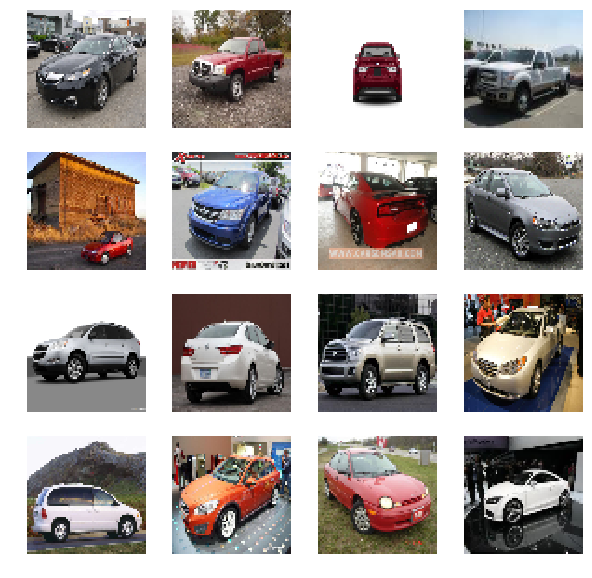

In [8]:
img_col = ImageCollector(np.asarray(images))
img_col.show(np.asarray(images))




In [16]:
# X_train = np.asarray(resized_images)
images[0].shape


(64, 64, 3)

In [11]:
from dcgan_model import DCGAN


In [18]:
tf.reset_default_graph()
dcgan = DCGAN()
dcgan.train(np.asarray(images), iters = 1000)

conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 8126
new size 8126
Step: 0, D_loss: 1.4198328256607056, G_loss: 0.2768388092517853
Step: 10, D_loss: 0.41469910740852356, G_loss: 1.0837831497192383
Step: 20, D_loss: 0.27057918906211853, G_loss: 1.439840316772461
Step: 30, D_loss: 0.030719488859176636, G_loss: 3.4994237422943115
Step: 40, D_loss: 0.0015589960385113955, G_loss: 6.466196537017822
Step: 50, D_loss: 0.00029033730970695615, G_loss: 8.146392822265625
Step: 60, D_loss: 0.07678760588169098, G_loss: 2.621593475341797
Step: 70, D_loss: 0.004045939538627863, G_loss: 5.514492511749268
Step: 80, D_loss: 0.0002828161232173443, G

KeyboardInterrupt: 

In [6]:
blob = bucket.get_blob('images/Cars/cars_train/00001.jpg')

In [7]:
s = blob.download_as_string()

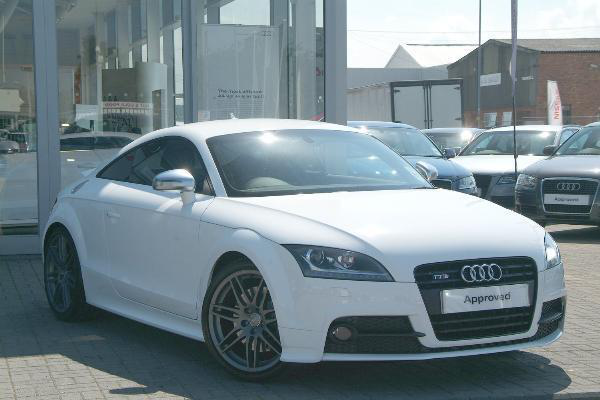

In [8]:
image = Image.open(io.BytesIO(s))
image

In [40]:
np.asarray(image).shape

(400, 600, 3)

In [67]:
t = resized_images[8040]

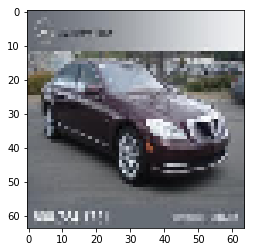

In [68]:
plt.imshow(t)
plt.show()

In [72]:
t.shape == (64,64,3)

True

In [12]:
celeba_blobs = bucket.list_blobs(prefix='images/CelebA/img_align_celeba/')
celeba_images = [] 


try:
    for blob in celeba_blobs:
        blob = bucket.get_blob(blob.name)
        s = blob.download_as_string()
        img = Image.open(io.BytesIO(s))
        resized_img = cv2.resize(np.asarray(img),(64,64))/127.5-1.0
        if resized_img.shape == (64,64,3):
            celeba_images.append(resized_img)
except:
    pass

In [14]:
# celeba_images[0]

In [15]:
len(celeba_images)

776

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

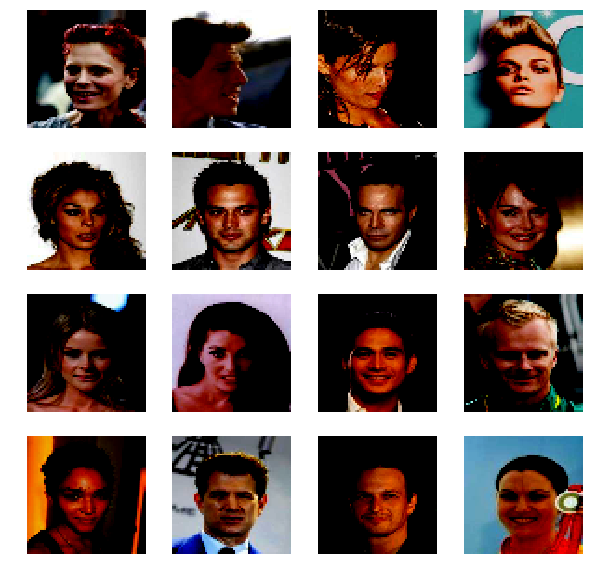

In [16]:
img_col = ImageCollector(np.asarray(celeba_images))
img_col.show(np.asarray(celeba_images))

In [17]:
from dcgan_model import DCGAN

tf.reset_default_graph()
dcgan = DCGAN()
dcgan.train(np.asarray(celeba_images), iters = 1000)

conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 776
new size 776
Step: 0, D_loss: 1.488551378250122, G_loss: 0.4204976558685303
Step: 10, D_loss: 0.9122280478477478, G_loss: 1.086270809173584
Step: 20, D_loss: 0.2529507875442505, G_loss: 3.131115198135376
Step: 30, D_loss: 0.05125456303358078, G_loss: 4.644392013549805
Step: 40, D_loss: 0.21642616391181946, G_loss: 5.119982719421387
Step: 50, D_loss: 0.11096528172492981, G_loss: 5.770333766937256
Step: 60, D_loss: 0.013869700022041798, G_loss: 7.336177825927734
Step: 70, D_loss: 0.04345794394612312, G_loss: 7.763217926025391
Step: 80, D_loss: 0.04313474893569946, G_loss: 5.711200

In [20]:
tf.train.get_checkpoint_state('checkpoints')

model_checkpoint_path: "checkpoints/DCGAN.ckpt"
all_model_checkpoint_paths: "checkpoints/DCGAN.ckpt"

In [22]:
checkpoint = tf.train.latest_checkpoint('checkpoints')


In [24]:
#Step 1 
#import the model metagraph
saver = tf.train.import_meta_graph('./checkpoints/DCGAN.ckpt.meta', clear_devices=True)
#make that as the default graph
graph = tf.get_default_graph()
input_graph_def = graph.as_graph_def()
sess = tf.Session()
#now restore the variables
saver.restore(sess, "./checkpoints/DCGAN.ckpt")


INFO:tensorflow:Restoring parameters from ./checkpoints/DCGAN.ckpt


In [25]:
#Step 2
# Find the output name
graph = tf.get_default_graph()
for op in graph.get_operations(): 
      print (op.name)


inputs/Placeholder
inputs/is_training
Placeholder
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/shape
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/min
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/max
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/RandomUniform
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/sub
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform/mul
Generator/fc_layer_g/g_fc_kernel_0/Initializer/random_uniform
Generator/fc_layer_g/g_fc_kernel_0
Generator/fc_layer_g/g_fc_kernel_0/Assign
Generator/fc_layer_g/g_fc_kernel_0/read
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/shape
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/min
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/max
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uniform/RandomUniform
Generator/fc_layer_g/fc_bias/g_fc_bias_0/Initializer/random_uni

fc_layer_d/d_fc_kernel_1/d_adam/Initializer/zeros/shape_as_tensor_1
fc_layer_d/d_fc_kernel_1/d_adam/Initializer/zeros_1
fc_layer_d/d_fc_kernel_1/d_adam/Assign_1
d_conv_layer_3/conv_bias/d_conv_bias_3/d_adam_1_1
save/Assign_58_1
d_conv_layer_3/conv_bias/d_conv_bias_3/d_adam_1/read_1
d_conv_layer_3/conv_bias/d_conv_bias_3/d_adam_1/Initializer/zeros_1
d_conv_layer_3/conv_bias/d_conv_bias_3/d_adam_1/Assign_1
d_conv_layer_3/conv_bias/d_conv_bias_3/d_adam_2
save/Assign_57_1
d_conv_layer_3/conv_bias/d_conv_bias_3/d_adam/read_1
d_conv_layer_3/conv_bias/d_conv_bias_3/d_adam/Initializer/zeros_1
d_conv_layer_3/conv_bias/d_conv_bias_3/d_adam/Assign_1
d_conv_layer_3/d_conv_kernel_3/d_adam_1_1
save/Assign_61_1
d_conv_layer_3/d_conv_kernel_3/d_adam_1/read_1
d_conv_layer_3/d_conv_kernel_3/d_adam_1/Initializer/zeros/Const_1
d_conv_layer_3/d_conv_kernel_3/d_adam_1/Initializer/zeros/shape_as_tensor_1
d_conv_layer_3/d_conv_kernel_3/d_adam_1/Initializer/zeros_1
d_conv_layer_3/d_conv_kernel_3/d_adam_1/Assig

train_step/g_adam/mul_2
train_step/g_adam/Assign_2
train_step/g_adam_1
train_step/gradients/LeakyRelu_4/mul_grad/tuple/control_dependency_2
train_step/gradients/LeakyRelu_5/mul_grad/tuple/control_dependency_2
train_step/gradients/LeakyRelu_6/mul_grad/tuple/control_dependency_2
train_step/gradients/LeakyRelu_7/mul_grad/tuple/control_dependency_2
logistic_loss_2/Log1p_1
logistic_loss_2/Select_2
logistic_loss_2/sub_1
logistic_loss_2_1
generator_loss_1
Generator_loss_1
logistic_loss_1/mul_1
logistic_loss_1/Neg_1
logistic_loss_1/GreaterEqual_1
train_step_1/gradients/logistic_loss_1/Select_grad/Select_1_1
train_step_1/gradients/logistic_loss_1/Select_grad/Select_2
train_step_1/gradients/logistic_loss_1/Select_grad/tuple/group_deps_1
train_step_1/gradients/logistic_loss_1/Select_grad/tuple/control_dependency_1_1
train_step_1/gradients/logistic_loss_1/Select_grad/tuple/control_dependency_2
logistic_loss_1/Select_1_1
logistic_loss_1/Exp_1
train_step_1/gradients/logistic_loss_1/Log1p_grad/add_1


train_step/gradients/LeakyRelu_5/Maximum_grad/GreaterEqual_2
LeakyRelu_5/Maximum_2
train_step_1/gradients/d_conv_layer_2_1/Conv2D_grad/ShapeN_2
train_step/gradients/d_conv_layer_2_1/Conv2D_grad/ShapeN_2
d_conv_layer_2_1/Conv2D_2
d_conv_layer_2_1/add_2
d_conv_layer_2_1/Relu_2
LeakyRelu_6/mul_2
train_step_1/gradients/LeakyRelu_6/Maximum_grad/GreaterEqual_2
train_step/gradients/LeakyRelu_6/Maximum_grad/GreaterEqual_2
LeakyRelu_6/Maximum_2
train_step_1/gradients/d_conv_layer_3_1/Conv2D_grad/ShapeN_2
train_step/gradients/d_conv_layer_3_1/Conv2D_grad/ShapeN_2
d_conv_layer_3_1/Conv2D_2
d_conv_layer_3_1/add_2
d_conv_layer_3_1/Relu_2
LeakyRelu_7/mul_2
train_step_1/gradients/LeakyRelu_7/Maximum_grad/GreaterEqual_2
train_step/gradients/LeakyRelu_7/Maximum_grad/GreaterEqual_2
LeakyRelu_7/Maximum_2
Reshape_1_2
fc_layer_d_1/MatMul_2
fc_layer_d_1/Add_2
train_step_1/gradients/logistic_loss_1/mul_grad/Mul_1_2
train_step_1/gradients/logistic_loss_1/mul_grad/tuple/group_deps_2
train_step_1/gradients/logi

In [ ]:
# with tf.Session() as sess:
#     # Restore checkpoint
#     tf.train.Saver().restore(sess, checkpoint)
            

In [26]:
#Step 3
from tensorflow.python.platform import gfile
from tensorflow.python.framework import graph_util

output_node_names="Sigmoid_3"
output_graph_def = graph_util.convert_variables_to_constants(
        sess, # The session
        input_graph_def, # input_graph_def is useful for retrieving the nodes 
        output_node_names.split(",")  )    



FailedPreconditionError: Attempting to use uninitialized value d_conv_layer_0/conv_bias/d_conv_bias_0_2
	 [[Node: d_conv_layer_0/conv_bias/d_conv_bias_0_2/_144 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_22_d_conv_layer_0/conv_bias/d_conv_bias_0_2", _device="/job:localhost/replica:0/task:0/device:GPU:0"](d_conv_layer_0/conv_bias/d_conv_bias_0_2)]]
	 [[Node: d_conv_layer_0/conv_bias/d_conv_bias_0_2/_145 = _Recv[_start_time=0, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_22_d_conv_layer_0/conv_bias/d_conv_bias_0_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
#Step 4
#output folder
output_fld ='./'
#output pb file name
output_model_file = 'model.pb'
from tensorflow.python.framework import graph_io
#write the graph
graph_io.write_graph(output_graph_def, output_fld, output_model_file, as_text=False)

In [38]:
np.asarray(celeba_images).shape

(2102, 64, 64, 3)

In [18]:
def add_noise(x, portion, amplitude):
        """
        Add random integer noise to self.x.
        :param portion: The portion of self.x samples to inject noise. If x contains 10000 sample and portion = 0.1,
                        then 1000 samples will be noise-injected.
        :param amplitude: An integer scaling factor of the noise.
        :return added: dataset with noise added
        """
        # TODO: Implement the add_noise function. Remember to record the
        # boolean value is_add_noise. You can try uniform noise or Gaussian
        # noise or others ones that you think appropriate.
        # raise NotImplementedError

        channels = 3
        num_of_samples = len(x)

        for i in range(num_of_samples):
            #in each sample, we need to shift for each channel
            random_boolean = np.random.choice(a=[True, False], size=1, p=[portion, 1-portion])

            if random_boolean == True:
                
                for j in range(channels):

                    mean = 0
                    std = 0.01
                    noise = amplitude * np.random.normal(mean, std, x[i,:,:,j].shape)
                    print(noise)
                    x[i,:,:,j] += noise


        return x #(x* 255).astype(np.uint8)



        







In [19]:
# celeba_images_noise = []
# for img in celeba_images:
#     new_img = add_noise(celeba_images, 1, 5)
#     celeba_images_noise.append(new_img)
add_noise(np.asarray(celeba_images), 1, 5)

[[ 0.07771172 -0.03539232 -0.0112973  ...  0.01949958  0.10865974
  -0.00711391]
 [ 0.01555603  0.06911271 -0.03979543 ... -0.0205591  -0.05885691
   0.01625887]
 [-0.05488073 -0.0653672  -0.0487368  ... -0.0214609  -0.03586142
   0.02519401]
 ...
 [ 0.00784327 -0.05731888  0.01622091 ...  0.01850181 -0.03731721
   0.07009519]
 [-0.10865754  0.06162549  0.05999165 ... -0.13681893  0.05928406
   0.08609515]
 [-0.01700659  0.07182398 -0.04056533 ...  0.05192456 -0.05005375
  -0.05179679]]
[[-0.0351213  -0.03342544  0.02679534 ... -0.03697441 -0.0441767
  -0.08464247]
 [-0.01122025  0.00247624  0.00319517 ... -0.03753253 -0.00104435
   0.0602179 ]
 [-0.01150062 -0.04684152  0.04634474 ...  0.00664681  0.01745953
  -0.02660504]
 ...
 [-0.03450114  0.05252455 -0.02869354 ... -0.02070295 -0.00960793
  -0.04589696]
 [ 0.01824072 -0.02277995  0.09913705 ... -0.05584242 -0.08604984
   0.01624308]
 [ 0.01355401  0.0146009  -0.01634913 ... -0.11269763  0.09236929
   0.03453674]]
[[ 0.00861868  0.

[[-0.05677445 -0.08907695  0.04051474 ... -0.0755533  -0.03017353
   0.07115017]
 [-0.05841537  0.0529216   0.0026869  ...  0.03160019  0.00645448
  -0.01955185]
 [-0.04144489  0.02415557 -0.03002073 ...  0.01850505 -0.01612959
  -0.05861812]
 ...
 [ 0.0937066   0.04891998 -0.01167184 ...  0.04333619 -0.02554286
  -0.06353352]
 [ 0.00290796 -0.00156208  0.05292034 ...  0.04913672  0.03370665
  -0.05720983]
 [ 0.04906055 -0.04282805  0.03472068 ... -0.01426864  0.0216253
  -0.00176316]]
[[ 0.03927116 -0.07334855  0.01915628 ... -0.02843838 -0.05730706
   0.01919497]
 [ 0.09631731 -0.03016257  0.0173312  ... -0.06046161 -0.01732216
  -0.10990814]
 [-0.05174749 -0.05016101 -0.03757048 ...  0.04412644  0.01147784
  -0.04002259]
 ...
 [-0.01026814  0.13831424 -0.03969269 ... -0.02182191  0.02659853
  -0.02579961]
 [-0.00993515 -0.08492536 -0.03641672 ... -0.0019937  -0.06934548
  -0.00091306]
 [ 0.00498925  0.01659492 -0.04657101 ... -0.00407534 -0.05166476
   0.01668791]]
[[ 0.05831761  0.

[[-0.00866536  0.01330511  0.02179515 ...  0.02465591  0.06947997
   0.05445587]
 [ 0.01937273  0.00302888 -0.04113033 ...  0.01128238 -0.07741191
  -0.00980125]
 [-0.07772701  0.0353038   0.00729953 ... -0.01263279 -0.01555983
  -0.05567087]
 ...
 [ 0.00622981 -0.03980647  0.03543314 ... -0.04098533  0.05790202
   0.00459834]
 [-0.03940891  0.02605494 -0.0316933  ... -0.00880156  0.02957255
  -0.01720207]
 [-0.06765142  0.04320677  0.02719287 ...  0.02440874  0.05104655
   0.02281442]]
[[-0.07131028  0.07504669  0.01545158 ... -0.00769464 -0.00138671
   0.07943423]
 [-0.03822918  0.01862321 -0.01777695 ...  0.05693045  0.04339734
   0.00885371]
 [ 0.02381704  0.00889725  0.03631967 ...  0.00212438 -0.01964171
  -0.07657342]
 ...
 [ 0.01434334  0.07161406  0.01815319 ...  0.02968241  0.03992953
   0.01430676]
 [-0.04136643 -0.09670549 -0.04961534 ...  0.01774713 -0.05346362
   0.04565137]
 [-0.12429716  0.04061336 -0.07353838 ...  0.05923068 -0.05934875
   0.09201653]]
[[ 0.04711408 -0

[[-0.05317265 -0.01103015 -0.0383986  ... -0.01381838 -0.05998095
  -0.00588156]
 [ 0.06083439 -0.0347354  -0.03320628 ...  0.09443774  0.03813749
   0.00866133]
 [ 0.00935212 -0.00572943 -0.0164524  ...  0.02021341  0.02432708
  -0.00095995]
 ...
 [ 0.06952728  0.05302825 -0.070532   ... -0.0662728   0.00455362
  -0.05894725]
 [-0.02642227  0.01611378  0.03455876 ...  0.03830124  0.02433084
   0.02193586]
 [-0.08041246 -0.05674628  0.02841597 ... -0.00607596  0.06647814
  -0.0688678 ]]
[[-0.0261871   0.04753283 -0.05278007 ...  0.00468753  0.02066291
  -0.03133931]
 [-0.05871427  0.02607856  0.0797777  ...  0.06096089 -0.04647086
  -0.09016606]
 [-0.08382577  0.02721305  0.00404023 ... -0.02183833  0.05326463
   0.04501127]
 ...
 [-0.04753292  0.01357642  0.00054824 ...  0.05248876 -0.1009045
   0.0500742 ]
 [ 0.09163117 -0.01901029  0.01106393 ... -0.05373195 -0.02007288
  -0.01528084]
 [-0.01799721 -0.10361371  0.1341042  ...  0.05096453  0.0224298
  -0.00625042]]
[[ 3.82533803e-02 

[[ 0.02997515 -0.02312857  0.06794731 ...  0.05535105  0.04845884
  -0.09316104]
 [-0.0622047   0.07786321  0.14445023 ...  0.06138844 -0.06428842
  -0.04346146]
 [ 0.00378104  0.00730545 -0.00701612 ...  0.11852463 -0.12855858
   0.02811819]
 ...
 [-0.00385389 -0.08213771  0.00356326 ... -0.00531981 -0.05934464
   0.06649004]
 [ 0.07174989 -0.06229837 -0.09829382 ...  0.11805708  0.02308196
  -0.04637683]
 [ 0.02270593 -0.00153379 -0.04186704 ...  0.01269854 -0.00105025
  -0.01552833]]
[[ 0.00941494  0.03024816  0.03627794 ... -0.034233    0.01988087
  -0.00993055]
 [ 0.04303     0.00249941  0.02977414 ... -0.0406954  -0.08280196
   0.04678271]
 [-0.01848014  0.05332768 -0.07366068 ... -0.01398312  0.00170233
   0.02054799]
 ...
 [-0.01042899  0.03579529 -0.04676557 ...  0.0265714   0.10649029
  -0.0354609 ]
 [-0.05290997 -0.09790389 -0.14091615 ... -0.03553353  0.00150599
  -0.05059026]
 [-0.00086946  0.05900838  0.03483038 ...  0.04505978  0.06621245
  -0.03457852]]
[[ 0.02132221  0

[[-0.01755935  0.01586977  0.03537967 ...  0.02926481  0.00832052
   0.03607205]
 [-0.00771444  0.06041624  0.06597358 ... -0.02029182  0.10279679
  -0.0184035 ]
 [-0.05913181 -0.05662393 -0.02227326 ... -0.05150287 -0.01006764
   0.01648795]
 ...
 [ 0.04235226  0.0241413   0.02752943 ... -0.07003843 -0.03692333
  -0.06747246]
 [-0.03037885 -0.09206957  0.04895084 ... -0.00170971  0.03226383
  -0.03263613]
 [-0.06933509  0.05857577  0.04667898 ... -0.00049822 -0.04760337
   0.05767236]]
[[ 0.11746736  0.04591893  0.0528802  ...  0.07757419  0.03132353
   0.01846421]
 [-0.05100088  0.07383932  0.01128594 ...  0.05346773  0.01196896
   0.027355  ]
 [-0.01692533 -0.06480847 -0.01622425 ...  0.01093033 -0.02662807
  -0.01102225]
 ...
 [-0.03067812  0.07944849  0.00109639 ... -0.02490809 -0.05260413
  -0.08374421]
 [-0.01391014 -0.07261005  0.04127704 ... -0.03196983 -0.09605916
   0.05262567]
 [ 0.00148359  0.06391214 -0.03948782 ... -0.09665788  0.01368102
   0.03957642]]
[[ 0.01143565  0

[[ 0.02413239 -0.0662091  -0.06350667 ... -0.01899565 -0.03127011
  -0.08955563]
 [-0.00428659  0.04983215  0.06064827 ...  0.03389628  0.03718196
  -0.03530285]
 [-0.02840366  0.00069817  0.04231186 ...  0.03418637  0.01230409
  -0.09363623]
 ...
 [ 0.03422378 -0.00348035  0.03751098 ...  0.05374595  0.01842082
   0.03462825]
 [-0.00464865  0.03826668 -0.00253338 ...  0.09424915 -0.06593084
  -0.08767152]
 [ 0.02892937  0.10864591  0.02268504 ... -0.03359927  0.0075998
  -0.095311  ]]
[[-0.0068635  -0.0174048   0.00326952 ... -0.0056185  -0.06817297
   0.02606205]
 [-0.06249687  0.04135858  0.00154022 ... -0.05346234  0.00658789
  -0.10912802]
 [ 0.08187199 -0.01732598  0.01272513 ... -0.04748707 -0.08904523
   0.06323202]
 ...
 [ 0.027391    0.04272138 -0.05165604 ...  0.08182255  0.03104363
   0.01317093]
 [-0.05183136 -0.01190283  0.02890329 ...  0.03914346  0.02135267
   0.05776278]
 [-0.04389691  0.059875    0.04963822 ... -0.00125671 -0.0837185
   0.01363223]]
[[ 0.02849205 -0.0

[[-0.00512588  0.00838833 -0.02607658 ... -0.03549756 -0.00340557
   0.00970605]
 [ 0.08812182 -0.01826799 -0.0041237  ... -0.02132067 -0.03489168
   0.03751675]
 [-0.02033825  0.02554088 -0.00157319 ... -0.03715065 -0.04918674
  -0.05805431]
 ...
 [ 0.07140703  0.11557937  0.0529804  ... -0.08117759 -0.03006054
  -0.00275501]
 [ 0.06168231 -0.02909127  0.04458001 ...  0.04112501 -0.07699466
  -0.08266334]
 [ 0.04902492 -0.00567905  0.09281477 ... -0.05036781 -0.04898789
   0.04617835]]
[[-4.05546005e-02 -1.49598520e-02  8.34205633e-02 ... -1.02465076e-02
   2.31119787e-02  1.22470421e-02]
 [ 2.85013808e-02 -2.69428066e-02  1.19993299e-02 ...  1.81027238e-02
  -1.03824966e-01 -6.17652178e-02]
 [-5.53993690e-02  7.33492099e-03  2.92581527e-02 ... -5.59774579e-02
   2.47540832e-02  2.45374013e-02]
 ...
 [ 7.83934021e-02 -2.58567858e-02 -2.34321819e-02 ...  6.97098551e-02
  -6.98186752e-02  7.64839689e-03]
 [ 1.50943066e-02  8.42696925e-02 -1.62108333e-02 ... -8.61575567e-03
   5.51939096

[[-0.0099234   0.07335766  0.00285483 ... -0.04351712  0.03911523
  -0.06137662]
 [ 0.08193431 -0.0597232  -0.09359193 ... -0.07812955 -0.10001987
   0.01784419]
 [-0.01995967 -0.07299483 -0.03834629 ...  0.03672652 -0.05015398
   0.0004568 ]
 ...
 [-0.04530033  0.03445    -0.07049827 ... -0.03480864 -0.00402199
   0.14071109]
 [ 0.04916747  0.04350693  0.04740129 ...  0.02077023 -0.01782964
  -0.00145299]
 [ 0.01525051  0.16533112  0.02987608 ... -0.01810303  0.07333924
  -0.02849309]]
[[ 0.08804901 -0.091122   -0.02633966 ... -0.08330148 -0.0236841
  -0.10751673]
 [-0.02505319  0.01783196 -0.03801093 ... -0.03714632 -0.03404858
  -0.07567781]
 [ 0.03023894 -0.0035434   0.03675983 ...  0.10984316 -0.02507361
   0.02006172]
 ...
 [-0.00199741  0.02786432 -0.08920802 ... -0.04419515  0.01026467
   0.04258449]
 [ 0.04339588 -0.04650552 -0.00131336 ...  0.05362973 -0.03455969
   0.04826411]
 [-0.02970232 -0.01818061  0.0030284  ... -0.01280532 -0.03640885
  -0.00589433]]
[[-0.06817624  0.

[[ 0.03186346 -0.10434072 -0.01322888 ...  0.03502021 -0.01546987
   0.04667492]
 [-0.03425573 -0.0105258  -0.07866337 ... -0.04800492  0.04917932
   0.06345469]
 [-0.03644594 -0.07228914  0.06370342 ... -0.05411888  0.01813434
  -0.0913324 ]
 ...
 [-0.03118658 -0.01754081 -0.08785427 ... -0.01941255  0.01391276
   0.03300087]
 [ 0.00543757 -0.04758379 -0.01990694 ... -0.03990222 -0.0650567
   0.06477489]
 [-0.12967062  0.03030469  0.03463529 ... -0.03306001 -0.04617328
   0.03369911]]
[[ 0.04854219 -0.01954652 -0.0086798  ...  0.00470073 -0.06886222
   0.00730453]
 [ 0.07578388 -0.01377524 -0.07071327 ...  0.04825994  0.07309504
   0.11668254]
 [ 0.05943452  0.01287124 -0.07103824 ... -0.00596694 -0.02749765
   0.0346476 ]
 ...
 [-0.0274866  -0.01025099  0.03120706 ... -0.09764405 -0.0299758
   0.01138565]
 [ 0.07714152  0.06818538  0.01322151 ... -0.13005976 -0.0036173
  -0.07479225]
 [ 0.0183293  -0.0226991   0.06015264 ... -0.0062971   0.05322543
   0.01177082]]
[[-0.03693486 -0.02

[[-0.05985926  0.02133287  0.10642824 ... -0.01519021  0.07283896
   0.00836738]
 [ 0.0029312   0.01897142  0.0161928  ... -0.03447186  0.01010776
  -0.12260517]
 [-0.01711397  0.00683578  0.04836015 ...  0.08667362  0.04434679
  -0.00486983]
 ...
 [-0.02965853  0.01349535 -0.04513595 ... -0.04228    -0.01299297
  -0.00828259]
 [ 0.01864605  0.05577183  0.09874597 ... -0.00633396 -0.05288482
   0.01465832]
 [ 0.08059084 -0.09124908  0.0180051  ...  0.05229945 -0.01434668
  -0.0393518 ]]
[[ 0.10285225  0.0673317   0.03304646 ... -0.00532381  0.00169073
  -0.06759809]
 [-0.07622247  0.01855555  0.06888826 ... -0.01453136  0.03857053
  -0.05908757]
 [-0.09275284 -0.06672914  0.01736537 ... -0.06670524  0.00679086
   0.0074122 ]
 ...
 [ 0.08122034 -0.0344011   0.03957105 ...  0.04705846 -0.04184826
  -0.13893604]
 [-0.02159735  0.04636614 -0.06457415 ...  0.00171469  0.07690518
   0.00204926]
 [-0.00546601  0.00801553 -0.07299964 ... -0.03431713  0.02997531
  -0.07537718]]
[[-0.04410549 -0

array([[[[ 1.06202544e+00,  7.76643403e-01,  5.30187303e-01],
         [ 9.48921405e-01,  7.78339271e-01,  5.33699891e-01],
         [ 9.73016428e-01,  8.38560046e-01,  5.86558853e-01],
         ...,
         [ 4.94009382e-01,  2.10084410e-01, -1.37825412e-01],
         [ 1.10865974e+00,  8.30333100e-01,  5.82072702e-01],
         [ 9.85042955e-01,  7.82024196e-01,  7.35295313e-01]],

        [[ 9.99869755e-01,  8.00544458e-01,  5.51187132e-01],
         [ 1.05342644e+00,  8.14240946e-01,  5.98921794e-01],
         [ 9.44518297e-01,  8.14959878e-01,  5.45940068e-01],
         ...,
         [ 5.48068352e-01,  3.03643939e-01, -6.81239842e-02],
         [ 9.17613682e-01,  8.57779179e-01,  6.57329419e-01],
         [ 1.00057260e+00,  9.19041431e-01,  6.52927252e-01]],

        [[ 9.29432999e-01,  8.00264083e-01,  5.06533557e-01],
         [ 9.18946523e-01,  7.64923184e-01,  5.67736156e-01],
         [ 9.35576927e-01,  8.58109445e-01,  5.18351870e-01],
         ...,
         [ 6.96186162e-0

In [ ]:
#normalize images to -1 and 1  - use /127.5
#start with a gaussian/normal distribution, not a uniform to start with 